In [26]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [27]:
tipdf= pd.read_csv("tips.csv")
tipdf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [28]:
tipdf.loc['2502020']=np.nan
# 2502020은 없는 인덱스 >> 2502020 인덱스를 추가하고 값은 NaN으로 채운다

In [29]:
# tipdf 차원을 조회
print(tipdf.ndim)
print(np.ndim(tipdf))

2
2


In [30]:
# tipdf의 크기를 조회(행,열) >> 튜플로 값 반환
print(tipdf.shape)
print(np.shape(tipdf))

(246, 7)
(246, 7)


In [31]:
# tipdf 데이터 조회
tipdf.head()
tipdf.tail()
tipdf.info() # columns 위에 info써도 둘 다 출력. info가 print기능 있어서 
tipdf.columns

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 2502020
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [40]:
# 가장 팁이 높은 데이터 상위 5개 출력
tipdf.sort_values(by="tip").head()

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1.0
236,12.60,1.00,Male,Yes,Sat,Dinner,2.0
92,5.75,1.00,Female,Yes,Fri,Dinner,2.0
111,7.25,1.00,Female,No,Sat,Dinner,1.0
0,16.99,1.01,Female,No,Sun,Dinner,2.0


In [38]:
# 총 지출 금액 대비 tip의 percent 구하는 함수 따로 정의
def get_tippct(df):
        return round(df["tip"]/df["total_bill"]*100,1)

In [47]:
# 1. tip_pct를 tipdf의 새로운 컬럼으로 추가
# 2. get_tippct 함수로 수한 값을 컬럼의 값으로 지정
# tipdf["tip_pct"]=tipdf.apply(get_tippct,axis=1) # 아래 코드와 같음
tipdf["tip_pct"]=get_tippct(tipdf)
tipdf

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
...,...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0,8.8
242,17.82,1.75,Male,No,Sat,Dinner,2.0,9.8
243,18.78,3.00,Female,No,Thur,Dinner,2.0,16.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# total_bill 과 tip_pct을 기준으로 내림차순
tipdf.sort_values(by=["total_bill","tip_pct"],ascending=[False,False]).head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0,19.7
212,48.33,9.00,Male,No,Sat,Dinner,4.0,18.6
59,48.27,6.73,Male,No,Sat,Dinner,4.0,13.9
156,48.17,5.00,Male,No,Sun,Dinner,6.0,10.4
182,45.35,3.50,Male,Yes,Sun,Dinner,3.0,7.7


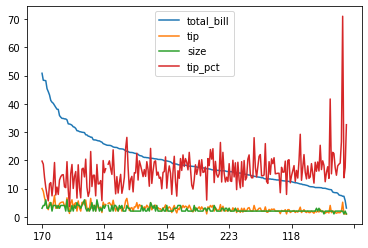

In [52]:
tipdf.sort_values(by=["total_bill","tip_pct"],ascending=[False,False]).plot()

In [64]:
# Male 정보를 따로 분리해서 tipdf_man이라는 데이터 프레임
tipdf_man=tipdf[tipdf["sex"]=="Male"]
tipdf_man.shape
tipdf_man.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.7
3,23.68,3.31,Male,No,Sun,Dinner,2.0,14.0
5,25.29,4.71,Male,No,Sun,Dinner,4.0,18.6
6,8.77,2.00,Male,No,Sun,Dinner,2.0,22.8
7,26.88,3.12,Male,No,Sun,Dinner,4.0,11.6
8,15.04,1.96,Male,No,Sun,Dinner,2.0,13.0
9,14.78,3.23,Male,No,Sun,Dinner,2.0,21.9
10,10.27,1.71,Male,No,Sun,Dinner,2.0,16.7
12,15.42,1.57,Male,No,Sun,Dinner,2.0,10.2


In [65]:
# FeMale 정보를 따로 분리해서 tipdf_man이라는 데이터 프레임
#tipdf_woman=tipdf[tipdf["sex"]=="Female"] # 아래와 같은 표현
tipdf_woman=tipdf[tipdf["sex"].isin(["Female"])]
tipdf_woman.shape
tipdf_woman.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.9
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.7
11,35.26,5.00,Female,No,Sun,Dinner,4.0,14.2
14,14.83,3.02,Female,No,Sun,Dinner,2.0,20.4
16,10.33,1.67,Female,No,Sun,Dinner,3.0,16.2
18,16.97,3.50,Female,No,Sun,Dinner,3.0,20.6
21,20.29,2.75,Female,No,Sat,Dinner,2.0,13.6
22,15.77,2.23,Female,No,Sat,Dinner,2.0,14.1
29,19.65,3.00,Female,No,Sat,Dinner,2.0,15.3
32,15.06,3.00,Female,No,Sat,Dinner,2.0,19.9


In [68]:
# tipdf_man, tipdf_woman 2개의 데이터프레임을 병합 >> tip_all 생성
tip_all=pd.concat([tipdf_man,tipdf_woman],keys=["man","woman"])
tip_all

total_bill   tip     sex smoker   day    time  size  tip_pct
man   1         10.34  1.66    Male     No   Sun  Dinner   3.0     16.1
      2         21.01  3.50    Male     No   Sun  Dinner   3.0     16.7
      3         23.68  3.31    Male     No   Sun  Dinner   2.0     14.0
      5         25.29  4.71    Male     No   Sun  Dinner   4.0     18.6
      6          8.77  2.00    Male     No   Sun  Dinner   2.0     22.8
...               ...   ...     ...    ...   ...     ...   ...      ...
woman 226       10.09  2.00  Female    Yes   Fri   Lunch   2.0     19.8
      229       22.12  2.88  Female    Yes   Sat  Dinner   2.0     13.0
      238       35.83  4.67  Female     No   Sat  Dinner   3.0     13.0
      240       27.18  2.00  Female    Yes   Sat  Dinner   2.0      7.4
      243       18.78  3.00  Female     No  Thur  Dinner   2.0     16.0

[244 rows x 8 columns]

In [74]:
# NaN값 생성하고 지우기
tip_all.loc["2020"]=np.nan
tip_all.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(woman, 238)",35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
"(woman, 240)",27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4
"(woman, 243)",18.78,3.00,Female,No,Thur,Dinner,2.0,16.0
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# 각 row별 누락데이터 확인 (2개 코드 결과는 같음)
tip_all.isna().sum(axis=1).sort_values(ascending=False)
tip_all.isnull().sum(axis=1).sort_values(ascending=False)

2020           8
2020           8
(man, 185)     0
(man, 184)     0
(man, 138)     0
              ..
(woman, 11)    0
(woman, 4)     0
(woman, 0)     0
(man, 242)     0
(man, 1)       0
Length: 246, dtype: int64

In [109]:
tip_all.dropna(how="any",inplace=True)

In [110]:
tip_all.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(woman, 226)",10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.8
"(woman, 229)",22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.0
"(woman, 238)",35.83,4.67,Female,No,Sat,Dinner,3.0,13.0
"(woman, 240)",27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.4
"(woman, 243)",18.78,3.00,Female,No,Thur,Dinner,2.0,16.0


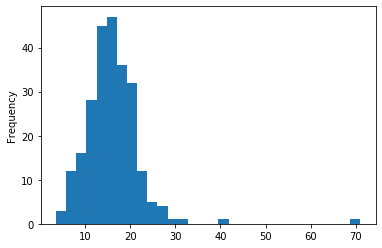

In [121]:
tipdf['tip_pct'].plot(kind="hist",bins=30)